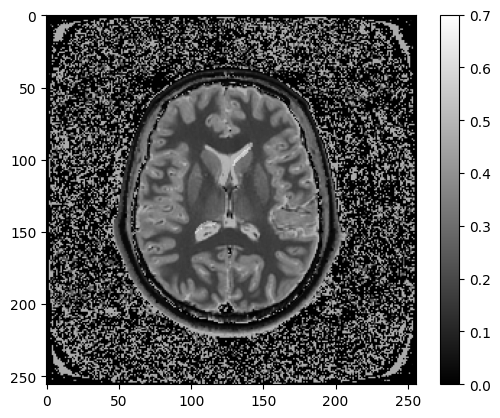

In [52]:
#| label: flair1jn

import nibabel as nib
import os
import numpy as np
import matplotlib.pyplot as plt

# SPGR function

def spgr(constant, T1, T2, TR, TE, FA):
    return (constant * ((1 - np.exp(-TR / T1)) / (1 - np.cos(FA) * np.exp(-TR / T1)))* np.sin(FA))*np.exp(-TE/T2)

def ir(constant, T1, T2, TR, TI, TE, FA):
    return constant * ((1- np.cos(np.pi) * np.exp(-TR / T1)- (1 - np.cos(np.pi))* np.exp(-TI / T1))/ (1- np.cos(np.pi)* np.cos(FA)* np.exp(-TR / T1)))*np.sin(FA)*np.exp(-TE/T2)

t1map = nib.load('../../data/07-Applications/FLAIR - T1 map.nii.gz').get_fdata()

# Simulate a T2 map by dividing the T1 map by 10
t2map = t1map / 10

# Get all the (x, y) ints in a grid that fall within a circle int(5) diameter for a center at (112,163)
#x, y = np.mgrid[:t1map.shape[0], :t1map.shape[1]]
#mask = (x - 115)**2 + (y - 158)**2 < 2.6**2
mask = nib.load('Mask.nii.gz').get_fdata()
mask=np.squeeze(mask)
# Introduce a circular lesion at 100 and 150
t2map[mask!=0] = t2map[mask!=0]*2
t1map[mask!=0] = t1map[mask!=0]*1.1

# Simulate a T2-weighted spgr image using the T1 and T2 values voxel-wise, TR = 4000 ms, TE = 100 ms, and FA = 90 degrees
TR = 5000
TE = 150
FA = 90
t2w=spgr(1, t1map, t2map, TR, TE, np.deg2rad(FA))

# Plot the T2-weighted spgr image in black and white
plt.imshow(np.rot90(t2w),cmap='grey')
plt.clim(0, 0.7)
plt.colorbar()
plt.show()


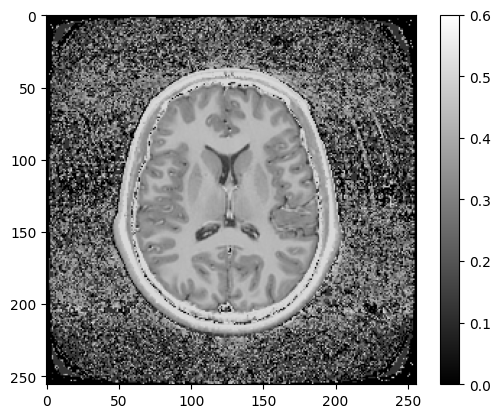

In [78]:
#| label: flair2jn
# Simulate a T1-weighted spgr image using the T1 and T2 values voxel-wise
TR = 500
TE = 15
FA = 70
t1w=spgr(1, t1map, t2map, TR, TE, np.deg2rad(FA))

# Plot the T2-weighted spgr image in black and white
plt.imshow(np.rot90(t1w),cmap='grey')
plt.clim(0, 0.6)
plt.colorbar()
plt.show()

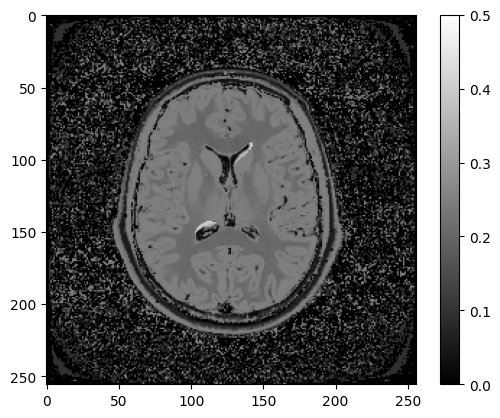

In [ ]:
#| label: flair3jn

# Simulate a T2-weighted spgr image using the T1 and T2 values voxel-wise, TR = 4000 ms, TE = 100 ms, and FA = 90 degrees
TR = 9000
TI = 2200
TE = 120
FA = 90

flair=ir(1, t1map, t2map, TR, TI, TE, np.deg2rad(FA))

# Plot the T2-weighted spgr image in black and white
plt.imshow(abs(np.rot90(flair)),cmap='gray')
plt.clim(0, 0.5)
plt.colorbar()
plt.show()